# <center>News Article Classification</center>
### <center>Category: _Text Processing_</center>
##### <center>CSC 317</center>

## Introduction

A news article discusses current or recent news of either general interest (i.e. daily newspapers) or on a specific topic (i.e. political or trade news magazines, club newsletters, or technology news websites). A news article can include accounts of eyewitnesses to the happening event. We must have seen the news divided into categories when we go to a news website. Some of the popular categories that you’ll see on almost any news website are tech, entertainment, sports, etc. If you want to know how to classify news categories using machine learning, this article is for you.

Every news website classifies the news article before publishing it so that every time visitors visit their website can easily click on the type of news that interests them. For example, some of us like to read the latest technology updates, so every time we visit a news website, we click on the technology section. But you may or may not like to read about technology, you may be interested in politics, business, entertainment, or maybe sports. Currently, the news articles are classified by hand by the content managers of news websites. But to save time, they can also implement a text processing model on their websites that read the news headline or the content of the news and classifies the category of the news.

## Text Classification

Text classification datasets are used to categorize natural language texts according to content. For example, think classifying news articles by topic, or classifying book reviews based on a positive or negative response. Text classification is also helpful for language detection, organizing customer feedback, and fraud detection.

While this process is time-consuming when done manually, it can be automated with machine learning models.

Category classification, for news, is a multi-label text classification problem. The goal is to assign one or more categories to a news article. A standard technique in multi-label text classification is to use a set of binary classifiers.

## Packages Required

In [1]:
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# EDA (Exploratory Data Analysis)
from wordcloud import WordCloud

# regular expressions
import re

# natural language processing libraries
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kalil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kalil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kalil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Know about Data

For the task of news classification using text processing techinques, we have collected a [dataset](https://docs.google.com/spreadsheets/d/1fvhiqN7b6E3j697F_LzR9YpJmPTrlHPz/edit?usp=sharing&ouid=102571066663734139638&rtpof=true&sd=true) from Kaggle, which contains news articles including their headlines and categories.

##### <u>Data Fields</u>

- __Article Id__ – Article id unique given to the record
- __Article__ – Text of the header and article
- __Category__ – Category of the article (tech, business, sport, entertainment, politics)

## Data Cleaning and Data Preprocessing

 Data preprocessing is the process of transforming raw data into an understandable format. It is also an important step in data mining as we cannot work with raw data. The quality of the data should be checked before applying machine learning or data mining algorithms.

### Dataset

In [2]:
dataset = pd.read_csv("BBC News.csv")
dataset.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


### First text of dataset

In [3]:
dataset['Text'][0]

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebb

### Check the shape (row and column) of the dataset.

In [4]:
dataset.shape

(1490, 3)

### Check Information of Columns of Dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


### Count Values of Categories

In [6]:
dataset['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

### Convert Categories Name into Numerical Index

There are five news categories i.e. Sports, Business, Politics, Entertainment, Tech.

### Convert the given news categories into categorical values.

In [7]:
# Associate Category names with numerical index and save it in new column CategoryId
target_category = dataset['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


In [8]:
dataset['CategoryId'] = dataset['Category'].factorize()[0]
dataset.head()

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


### Show Category’s Name w.r.t Category ID

In [9]:
# Create a new pandas dataframe "category", which only has unique Categories, also sorting this list in order of CategoryId values
category = dataset[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

,Category,CategoryId
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


## Exploratory Data Analysis (EDA)

In data mining, Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task. It is not easy to look at a column of numbers or a whole spreadsheet and determine important characteristics of the data. It may be tedious, boring, and/or overwhelming to derive insights by looking at plain numbers. Exploratory data analysis techniques have been devised as an aid in this situation.

### Visualizing Data

The below graph shows the news article count for category from our dataset.

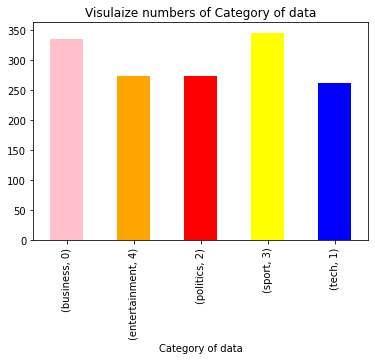

In [10]:
dataset.groupby('Category').CategoryId.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

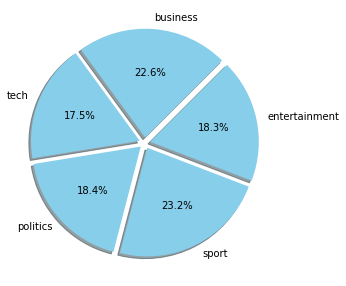

In [11]:
fig = plt.figure(figsize = (5,5))
colors = ["skyblue"]
business = dataset[dataset['CategoryId'] == 0 ]
tech = dataset[dataset['CategoryId'] == 1 ]
politics = dataset[dataset['CategoryId'] == 2]
sport = dataset[dataset['CategoryId'] == 3]
entertainment = dataset[dataset['CategoryId'] == 4]
count = [business['CategoryId'].count(), tech['CategoryId'].count(), politics['CategoryId'].count(), sport['CategoryId'].count(), entertainment['CategoryId'].count()]
pie = plt.pie(count, labels = ['business', 'tech', 'politics', 'sport', 'entertainment'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05))

### Visualizing Category Related Words

Here we use the word cloud module to show the category-related words.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

business related words:


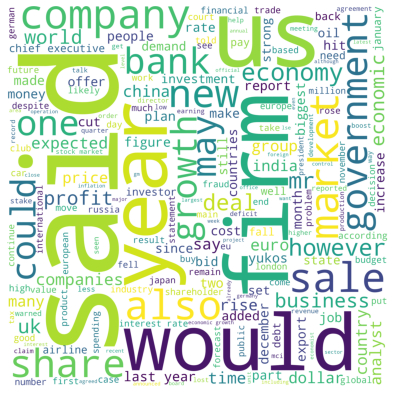

tech related words:


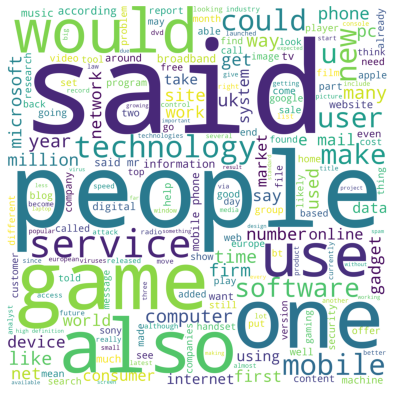

politics related words:


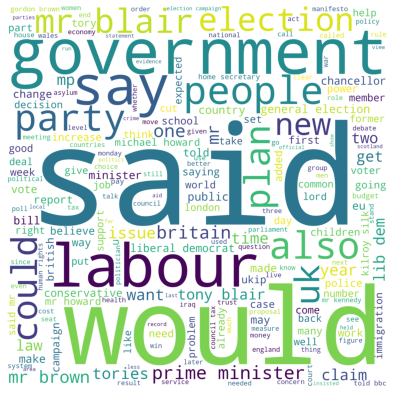

sport related words:


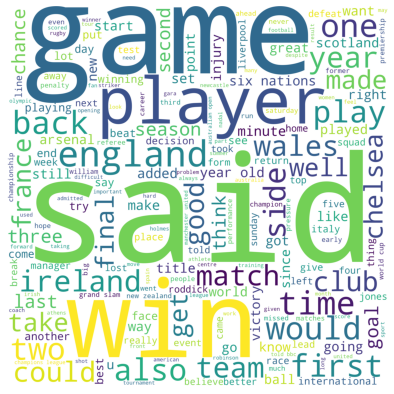

entertainment related words:


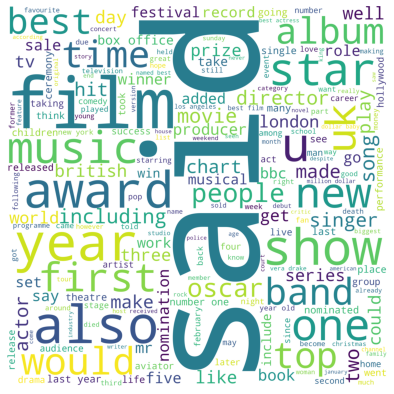

In [12]:
from wordcloud import WordCloud
stop = set(stopwords.words('english'))

business = dataset[dataset['CategoryId'] == 0]
business = business['Text']

tech = dataset[dataset['CategoryId'] == 1]
tech = tech['Text']

politics = dataset[dataset['CategoryId'] == 2]
politics = politics['Text']

sport = dataset[dataset['CategoryId'] == 3]
sport = sport['Text']

entertainment = dataset[dataset['CategoryId'] == 4]
entertainment = entertainment['Text']


def wordcloud_draw(dataset, color = 'white'):
  words = ' '.join(dataset)
  cleaned_word = ' '.join([word for word in words.split()
                           if (word != 'news' and word != 'text')])
  wordcloud = WordCloud(stopwords = stop,
                        background_color = color,
                        width = 2500, height = 2500).generate(cleaned_word)

  plt.figure(1, figsize = (10,7))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

print("business related words:")
wordcloud_draw(business, 'white')

print("tech related words:")
wordcloud_draw(tech, 'white')

print("politics related words:")
wordcloud_draw(politics, 'white')

print("sport related words:")
wordcloud_draw(sport, 'white')

print("entertainment related words:")
wordcloud_draw(entertainment, 'white')

## Text Processing

### Show Text Column of Dataset

In [13]:
text = dataset["Text"]
text.head(10)

0    worldcom ex-boss launches defence lawyers defe...
1    german business confidence slides german busin...
2    bbc poll indicates economic gloom citizens in ...
3    lifestyle  governs mobile choice  faster  bett...
4    enron bosses in $168m payout eighteen former e...
5    howard  truanted to play snooker  conservative...
6    wales silent on grand slam talk rhys williams ...
7    french honour for director parker british film...
8    car giant hit by mercedes slump a slump in pro...
9    fockers fuel festive film chart comedy meet th...
Name: Text, dtype: object

### Show Category Column of Dataset

In [14]:
category = dataset['Category']
category.head(10)

0         business
1         business
2         business
3             tech
4         business
5         politics
6            sport
7    entertainment
8         business
9    entertainment
Name: Category, dtype: object

### Remove All Tags

First, we remove all tags which are present in our given dataset.

In [15]:
def remove_tags(text):
  remove = re.compile(r'')
  return re.sub(remove, '', text)
dataset['Text'] = dataset['Text'].apply(remove_tags)

### Remove Special Characters

Here we remove all the special characters.

In [16]:
def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews
dataset['Text'] = dataset['Text'].apply(special_char)

### Convert Everything in Lower Case

We convert all articles or text to lower case.

It is one of the simplest and most effective forms of text preprocessing. It is applicable to most text mining and NLP problems and can help in cases where your dataset is not very large and significantly helps with the consistency of expected output.

In [17]:
def convert_lower(text):
   return text.lower()
dataset['Text'] = dataset['Text'].apply(convert_lower)
dataset['Text'][1]

'german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy   munich based research institute ifo said that its confidence index fell to 95 5 in february from 97 5 in january  its first decline in three months  the study found that the outlook in both the manufacturing and retail sectors had worsened  observers had been hoping that a more confident business sector would signal that economic activity was picking up    we re surprised that the ifo index has taken such a knock   said dz bank economist bernd weidensteiner   the main reason is probably that the domestic economy is still weak  particularly in the retail trade   economy and labour minister wolfgang clement called the dip in february s ifo confidence figure  a very mild decline   he said that despite the retreat  the index remained at a relatively high level and that he expected  a modest economic upswing  to continue   germany s economy grew 1 

### Remove all Stopwords

A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.
We would not want these words to take up space in our database, or take up the valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words. NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages.

In [18]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]
dataset['Text'] = dataset['Text'].apply(remove_stopwords)
dataset['Text'][1]

['german',
 'business',
 'confidence',
 'slides',
 'german',
 'business',
 'confidence',
 'fell',
 'february',
 'knocking',
 'hopes',
 'speedy',
 'recovery',
 'europe',
 'largest',
 'economy',
 'munich',
 'based',
 'research',
 'institute',
 'ifo',
 'said',
 'confidence',
 'index',
 'fell',
 '95',
 '5',
 'february',
 '97',
 '5',
 'january',
 'first',
 'decline',
 'three',
 'months',
 'study',
 'found',
 'outlook',
 'manufacturing',
 'retail',
 'sectors',
 'worsened',
 'observers',
 'hoping',
 'confident',
 'business',
 'sector',
 'would',
 'signal',
 'economic',
 'activity',
 'picking',
 'surprised',
 'ifo',
 'index',
 'taken',
 'knock',
 'said',
 'dz',
 'bank',
 'economist',
 'bernd',
 'weidensteiner',
 'main',
 'reason',
 'probably',
 'domestic',
 'economy',
 'still',
 'weak',
 'particularly',
 'retail',
 'trade',
 'economy',
 'labour',
 'minister',
 'wolfgang',
 'clement',
 'called',
 'dip',
 'february',
 'ifo',
 'confidence',
 'figure',
 'mild',
 'decline',
 'said',
 'despite',
 'r

### Lemmatizing the Words

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.  lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.

In [19]:
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
dataset['Text'] = dataset['Text'].apply(lemmatize_word)
dataset['Text'][1]

'german business confidence slide german business confidence fell february knocking hope speedy recovery europe largest economy munich based research institute ifo said confidence index fell 95 5 february 97 5 january first decline three month study found outlook manufacturing retail sector worsened observer hoping confident business sector would signal economic activity picking surprised ifo index taken knock said dz bank economist bernd weidensteiner main reason probably domestic economy still weak particularly retail trade economy labour minister wolfgang clement called dip february ifo confidence figure mild decline said despite retreat index remained relatively high level expected modest economic upswing continue germany economy grew 1 6 last year shrinking 2003 however economy contracted 0 2 last three month 2004 mainly due reluctance consumer spend latest indication growth still proving elusive ifo president han werner sinn said improvement german domestic demand sluggish export

### After Cleaning Text our Dataset

In [20]:
# save the processed data for accompanying the model that will be deployed.
dataset.to_json('./static/temp/vocabulary.json')

## Modelling

We need to find a machine learning model that can classify the processed text accordingly into its correct category. The model is also needed for deploying onto the news system

In [21]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_fscore_support as score

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

import pickle

### Declared Dependent and Independent Value

In [22]:
x = dataset['Text']
y = dataset['CategoryId']

### Create and Fit Bag of Words Model

In this step, we construct a vector, which would tell us whether a word in each sentence is a frequent word or not. If a word in a sentence is a frequent word, we set it as 1, else we set it as 0.

Whenever we apply any algorithm in NLP, it works on numbers. We cannot directly feed our text into that algorithm. Hence, the Bag of Words model is used to preprocess the text by converting it into a bag of words, which keeps a count of the total occurrences of the most frequently used words.

In [23]:
x = np.array(dataset.iloc[:,0].values)
y = np.array(dataset.CategoryId.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(dataset.Text).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (1490, 5000)
y.shape =  (1490,)


### Create, Fit and Predict all ML Model

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

perform_list = [ ]

def run_model(model_name, est_c, est_pnlty):
    mdl=''
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)
    elif model_name == 'Support Vector Classifer':
        mdl = SVC()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
   

    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)
    
    
    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision : {precision}')

    # Add performance parameters to list
    perform_list.append(dict([
        ('Model', model_name),
        ('Test Accuracy', round(accuracy, 2)),
        ('Precision', round(precision, 2)),
         ]))

run_model('Logistic Regression', est_c=None, est_pnlty=None)
run_model('Random Forest', est_c=None, est_pnlty=None)
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

1043
447
Test Accuracy Score of Basic Logistic Regression: % 97.09
Precision : 0.970917225950783
Test Accuracy Score of Basic Random Forest: % 97.99
Precision : 0.9798657718120806
Test Accuracy Score of Basic Multinomial Naive Bayes: % 97.09
Precision : 0.970917225950783
Test Accuracy Score of Basic Support Vector Classifer: % 96.64
Precision : 0.9664429530201343
Test Accuracy Score of Basic Decision Tree Classifier: % 82.33
Precision : 0.8232662192393736
Test Accuracy Score of Basic Gaussian Naive Bayes: % 76.06
Precision : 0.7606263982102909


### Create Dataframe of Model, Accuracy, and Precision

In [25]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision']]
model_performance

,Model,Test Accuracy,Precision
0,Logistic Regression,97.09,0.97
1,Random Forest,97.99,0.98
2,Multinomial Naive Bayes,97.09,0.97
3,Support Vector Classifer,96.64,0.97
4,Decision Tree Classifier,82.33,0.82
5,Gaussian Naive Bayes,76.06,0.76


Here, after training and testing the model we find that Random Forest Classifier model has given the best accuracy from all machine learning models. We now fit and predict our best model i.e. Random Forest.

In [26]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)

## Test to categorize News Article

Now, here, after the completion of model analysis, we can also predict any news articles.

In [27]:
# y_pred1 = cv.transform(['Hour ago, I contemplated retirement for a lot of reasons. I felt like people were not sensitive enough to my injuries. I felt like a lot of people were backed, why not me? I have done no less. I have won a lot of games for the team, and I am not feeling backed, said Ashwin'])

y_pred1 = cv.transform(['french honour for director parker british film director sir alan parker has been made an officer in the order of arts and letters  one of france s highest cultural honours.  sir alan received his decoration in paris on wednesday from french culture minister renaud donnedieu de vabres.  you have explored the possibilities of film with an immense talent   mr de vabres said as he presented the award. parker praised french films  saying:  hollywood  which created modern cinema  uses it only as a commodity.  he told the minister:  i am honoured to be thus distinguished by france  the flag carrier of cinema throughout the world.  sir alan s films include oscar-winning fame plus midnight express and the commitments.  a founding member of the director s guild of great britain  he is a former chairman of the uk film council and on the board of the british film institute.  through your work and your campaigns  you have shown us how the artist occupies an essential place in our contemporary society   mr de vabres said.  through your dreams which you show us  through the links that you weave  you question the world through the mirror of your work.  he also cited the director s 2003 film the life of david gale  in which kevin spacey played a man on death row  as proof of his  veritable artistic commitment against the death sentence .'])

yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
  result = "Business News"
elif yy == [1]:
  result = "Tech News"
elif yy == [2]:
  result = "Politics News"
elif yy == [3]:
  result = "Sports News"
elif yy == [4]:
  result = "Entertainment News"
print(result)

Entertainment News


## Save selected model to disk to deploy on news web app

In [28]:
pickle.dump(classifier, open('static\model\classifier_text.pkl', 'wb'))